In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [6]:
clf = DecisionTreeClassifier(random_state=0).fit(Xtrain,Ytrain)
rcf = RandomForestClassifier(random_state=0).fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rcf.score(Xtest,Ytest)

print('Single tree:{}'.format(score_c))
print('Random forest:{}'.format(score_r))


Single tree:0.9629629629629629
Random forest:1.0


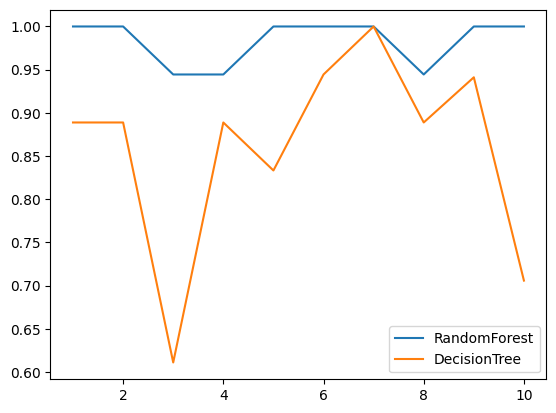

In [8]:
# 进行cross_val 交叉验证

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label='RandomForest')
plt.plot(range(1,11),clf_s,label='DecisionTree')
plt.legend()
plt.show()

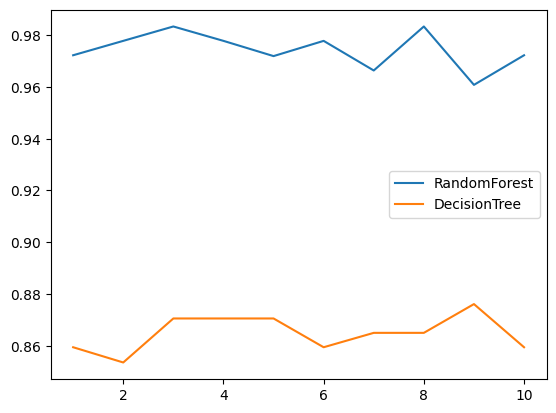

In [12]:
rfc_1 = []
clf_1 = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_1.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_1.append(clf_s)

plt.plot(range(1,11),rfc_1,label='RandomForest')
plt.plot(range(1,11),clf_1,label='DecisionTree')
plt.legend()
plt.show()


0.9888888888888889 21


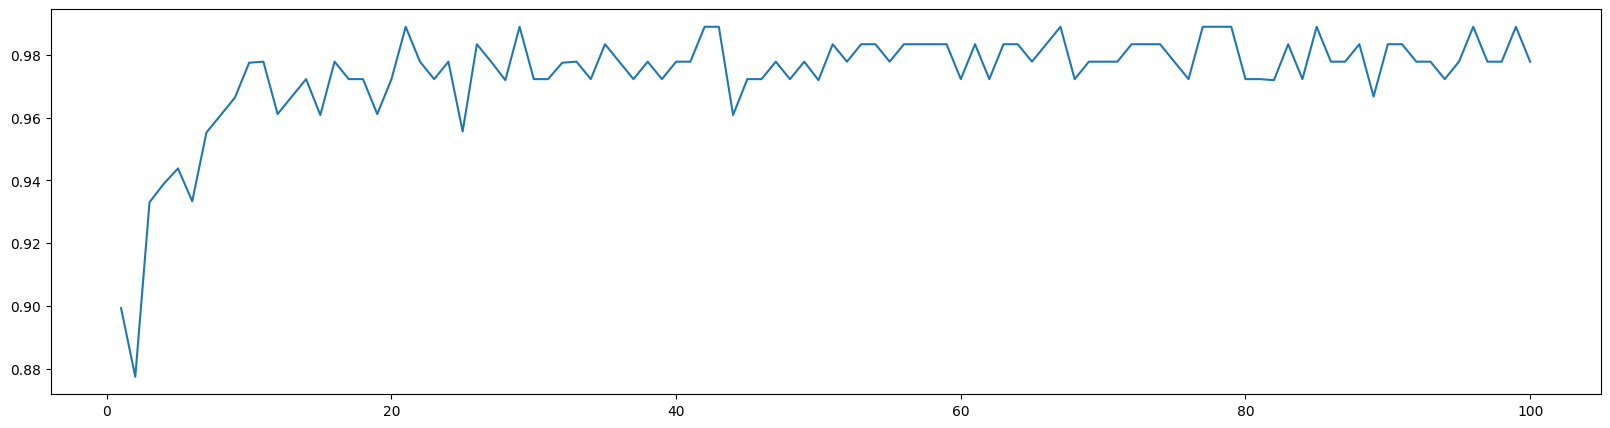

In [15]:
# 学习曲线
superpa = []
for i in range(100):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,101),superpa)
plt.show()

In [17]:
rfc = RandomForestClassifier(n_estimators=25
                            ,random_state=2
)
rfc = rfc.fit(Xtrain,Ytrain)

In [23]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1872583848),
 DecisionTreeClassifier(max_features='sqrt', random_state=794921487),
 DecisionTreeClassifier(max_features='sqrt', random_state=111352301),
 DecisionTreeClassifier(max_features='sqrt', random_state=1853453896),
 DecisionTreeClassifier(max_features='sqrt', random_state=213298710),
 DecisionTreeClassifier(max_features='sqrt', random_state=1922988331),
 DecisionTreeClassifier(max_features='sqrt', random_state=1869695442),
 DecisionTreeClassifier(max_features='sqrt', random_state=2081981515),
 DecisionTreeClassifier(max_features='sqrt', random_state=1805465960),
 DecisionTreeClassifier(max_features='sqrt', random_state=1376693511),
 DecisionTreeClassifier(max_features='sqrt', random_state=1418777250),
 DecisionTreeClassifier(max_features='sqrt', random_state=663257521),
 DecisionTreeClassifier(max_features='sqrt', random_state=878959199),
 DecisionTreeClassifier(max_features='sqrt', random_state=854108747),
 DecisionTre

In [25]:
rfc.estimators_[0].random_state

1872583848

In [26]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [28]:
# 不划分训练集和测试集,相当于放回的抽样
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [29]:
rfc.oob_score_

0.9662921348314607

In [31]:
# 查看每个属性的重要性
rfc.feature_importances_

array([0.1258538 , 0.03126675, 0.00967404, 0.01542916, 0.03521999,
       0.06414601, 0.15193787, 0.00649043, 0.02141854, 0.22426761,
       0.08581152, 0.09812831, 0.13035598])

In [32]:
rfc.score(Xtest,Ytest)

1.0

In [33]:
rfc.apply(Xtest)

array([[12, 20, 18, ..., 13, 12, 21],
       [12, 20, 18, ..., 13, 12, 21],
       [ 6, 19, 10, ...,  9,  4, 12],
       ...,
       [ 2,  9,  2, ...,  7,  8, 13],
       [12, 20, 18, ..., 13,  6, 21],
       [12, 20, 18, ..., 13, 12, 21]])

In [35]:
rfc.predict(Xtest)

array([0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 0, 0])

In [36]:
rfc.predict_proba(Xtest)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.  , 0.92],
       [0.  , 0.84, 0.16],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.16, 0.84],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.04, 0.88, 0.08],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.96, 0.04, 0.  ],
       [0.  , 0.08, 0.92],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.12, 0.8 , 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
 